In [18]:
# Importamos las librerias que usaremos

import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Analisis exploratorio del dataset de peliculas

In [ ]:
# Importamos el dataset

movies_df = pd.read_csv("API/datasets/movies_titles.csv")

Verificamos la cantidad de filas y columnas de nuestro dataset

In [13]:
print(f"Hay {movies_df.shape[0]} filas y {movies_df.shape[1]} columnas") 

Hay 22998 filas y 17 columnas


Mostramos las primeras 5 filas del dataset para visualizarlo

In [15]:
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,platform,duration_int,duration_type,score
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,amazon,113.0,min,3.467131
1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,as2,amazon,110.0,min,3.548682
2,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,amazon,74.0,min,3.500000
3,s4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69 min,documentary,"pink breaks the mold once again, bringing her ...",as4,amazon,69.0,min,3.538055
4,s5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45 min,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,amazon,45.0,min,3.478992


Veamos la cantidad de nulos por columna

In [17]:
movies_df.isnull().sum()

show_id              0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
duration           482
listed_in            0
description          4
id                   0
platform             0
duration_int       482
duration_type      482
score                0
dtype: int64

Como podemos observar **no hay ninguna fila mayoritariamente nula** por lo que no sería correcto eliminar los nulos del dataset.

Realizamos un histograma

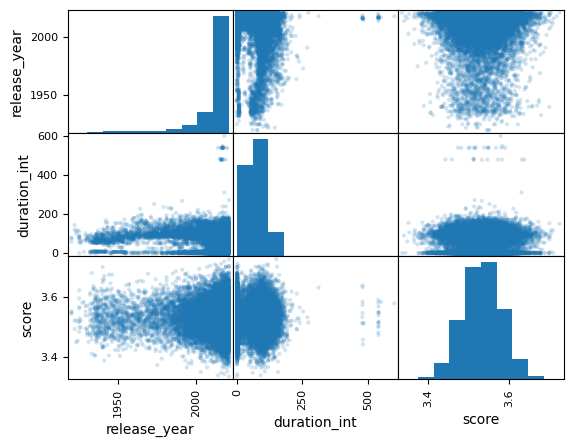

In [30]:
pd.plotting.scatter_matrix(movies_df, alpha=0.2) # Gráfico de dispersión entre varias columnas

plt.show()

### Identificamos los valores duplicados

In [33]:
movies_df.duplicated().sum()

0

como podemos ver **no hay valores duplicados** en nuestro dataset

### Overview del dataset de peliculas

In [36]:
prof_movies = ProfileReport(movies_df)

prof_movies

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


## Analisis exploratorio del dataset de scores

Ahora vamos a concentrar nuestra atención en el dataset de scores ya que es el dataset que usaremos en mayor medida para hacer nuestro sistema de recomendación mas adelante

In [2]:
# Abrimos el dataset de scores

scores_df = pd.read_csv("datasets/scores.csv")

Veamos la cantidad de columnas y filas que hay en el dataset

In [3]:
print(f"Hay {scores_df.shape[0]} filas y {scores_df.shape[1]} columnas") 

Hay 11024289 filas y 4 columnas


Revisemos las primeras 5 filas de nuestro dataset para tenerlas de ejemplo

In [4]:
scores_df.head()

,userId,score,timestamp,movieId
0,1,1.0,2015-03-09,as680
1,1,4.5,2015-03-09,ns2186
2,1,5.0,2015-03-09,hs2381
3,1,5.0,2015-03-09,ns3663
4,1,5.0,2015-03-09,as9500


Veamos cuantos userId unicos hay

In [10]:
print(f"Hay {len(scores_df['userId'].unique())} usuarios unicos")

Hay 115077 usuarios unicos


Nos preguntamos cuantas peliculas ha calificado cada usuario

In [11]:
# Numero de peliculas que ha calificado el usuario
scores_by_users = scores_df.groupby(['userId']).count()
scores_by_users.head()

,score,timestamp,movieId
userId,,,
1,27,27,27
2,22,22,22
3,10,10,10
4,62,62,62
5,26,26,26


Observemos los tipos de los datos

In [5]:
scores_df.dtypes

userId         int64
score        float64
timestamp     object
movieId       object
dtype: object

Para mejorar el tiempo de procesamiento al elaborar nuestro modelo predictivo mas adelante, realizaremos un cambio en el tipo de algunas variables.

Cambiaremos el tipo de las variables userId a int32 y a score a un float16 (ya que toma valores decimales entre 1 y 5)

In [6]:
import numpy as np

In [7]:
scores_df.userId=scores_df.userId.astype(np.int32)

scores_df.score=scores_df.score.astype(np.float16)

scores_df.dtypes

userId         int32
score        float16
timestamp     object
movieId       object
dtype: object

### Valores nulos del dataset

In [9]:
scores_df.isnull().sum()

userId       0
score        0
timestamp    0
movieId      0
dtype: int64

Podemos ver el dataset no tiene ningun valor nulo.

### Valores duplicados

In [8]:
print(f"Hay {scores_df.duplicated().sum()} valores duplicados")


Hay 10466 valores duplicados


In [17]:
# Los eliminamos

scores_df.drop_duplicates(inplace = True)

In [26]:
print(f"Ahora hay {scores_df.duplicated().sum()} valores duplicados")

Ahora hay 0 valores duplicados


### Guaramos nuestro dataset

In [27]:
scores_df.to_csv('datasets/scores.csv', index=False)

### Overview del dataset de scores

In [28]:
# Hacemos un profile report del dataset
prof_scores = ProfileReport(scores_df)

prof_scores

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]